In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')

from lib import *

In [4]:
k = 9
ref = 'human'
name = 'Malaria'

likelihoods_human = pd.read_csv('data/proteome-ref%s-k%i-Human.zip'%(ref, k))['likelihoods']

with open(datadir+ 'triplet-%s.json' % ref, 'r') as f:
    tripletparams = json.load(f)
loglikelihood = lambda seq, k: loglikelihood_triplet(seq, **tripletparams, k=k)
likelihoodname = 'triplet'

df_ts = load_iedb_tcellepitopes(human_only=True)
df_bs = load_iedb_bcellepitopes(human_only=True)

In [27]:
pathogenproteomes = load_proteomes(only_pathogens=True)
row = pathogenproteomes.loc[name]
iedbname = row['iedbname']
path = datadir + row['path']

likelihoods_pathogen = np.asarray(pd.read_csv('data/proteome-ref%s-k%i-%s.zip'%(ref, k, name))['likelihoods'])

df_t = df_ts[df_ts['Epitope', 'Parent Species'].str.contains(iedbname, na=False)]
epi_t = df_t['Epitope', 'Description'].unique()
likelihoods_t, weights_t = likelihoods_epitopes(epi_t, loglikelihood, k)
df_b = df_bs[df_bs['Epitope', 'Parent Species'].str.contains(iedbname, na=False)]
epi_b = df_b['Epitope', 'Description'].unique()
likelihoods_b, weights_b = likelihoods_epitopes(epi_b, loglikelihood, k)
len(epi_t), len(epi_b)

(968, 984)

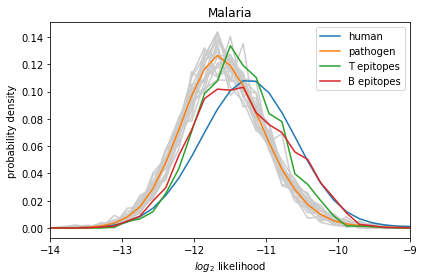

In [24]:
fig, ax = plt.subplots()
ps = [likelihoods_human, likelihoods_pathogen]
labels = ['human', 'pathogen']
weights = [np.ones(len(likelihoods_human)), np.ones(len(likelihoods_pathogen))]
if len(likelihoods_t) > 100:
    ps.append(likelihoods_t)
    labels.append('T epitopes')
    weights.append(weights_t)
if len(likelihoods_b) > 100:
    ps.append(likelihoods_b)
    labels.append('B epitopes')
    weights.append(weights_b)
for i in range(20):
    values = np.random.choice(likelihoods_pathogen, size=len(epi_t))
    xmin=-14.1
    xmax=-8.9
    nbins=30
    bins = np.linspace(xmin, xmax, nbins)
    counts, bins = np.histogram(values, bins=bins)
    counts = counts/len(values)
    ax.plot(0.5*(bins[:-1]+bins[1:]), counts, '.8')
plot_histograms(ps, labels, weights=weights, xmin=-14.1, xmax=-8.9, ax=ax, nbins=30)
ax.set_xlim(-14, -9)
ax.set_ylabel('probability density')
ax.set_xlabel('$log_2$ likelihood')
plt.title(name)
fig.tight_layout()

In [62]:
means = sorted([np.mean(np.random.choice(likelihoods_pathogen, size=len(epi_t))) for i in range(100000)])

In [63]:
mt, mb = np.mean(likelihoods_t), np.mean(likelihoods_b)

In [64]:
np.searchsorted(means, mt), np.searchsorted(means, mb)

(100000, 100000)

In [65]:
means[-1]

-11.508079545454548